In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import my_function
import time_dependent_tree
import random
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import STL

In [2]:
np.random.seed(314) # 乱数シードを314に設定
# 合成波の作成
syn_t = my_function.make_wave(0.5, 1.0, 3.0, 100)[0]
syn_y = my_function.make_wave(0.5, 1.0, 3.0, 100)[1] + my_function.make_wave(0.75, 1.7, 3.0, 100)[1] + 0.05 * np.random.randn(len(syn_t))

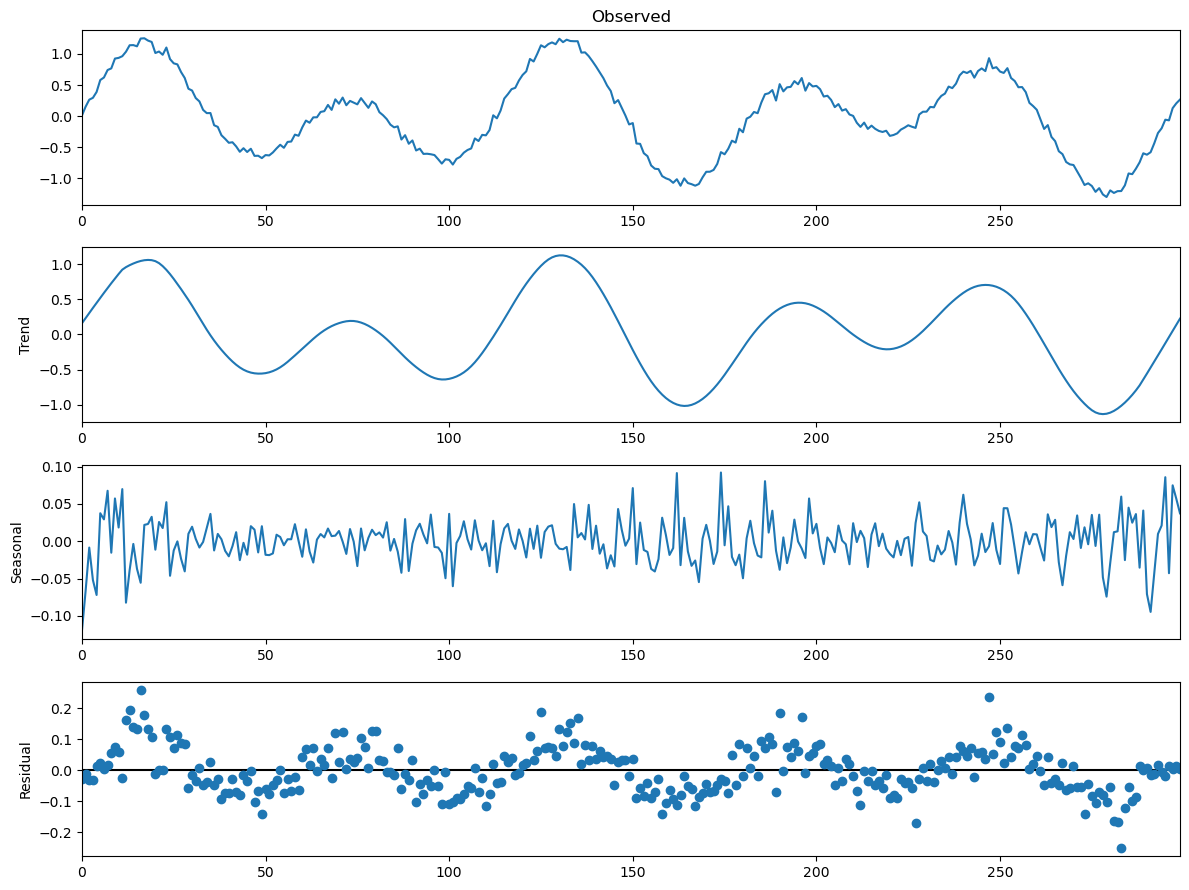

In [3]:
# STL分解
stl=STL(syn_y, period=12, robust=True)
stl_series = stl.fit()
# STL分解結果のグラフ化
plt.rcParams['figure.figsize'] = [12, 9]
stl_series.plot()
plt.show()

In [4]:
# データの整形
trend_x, trend_y = my_function.sliding_window(stl_series.trend)
seasonal_x, seasonal_y = my_function.sliding_window(stl_series.seasonal)
resid_x, resid_y = my_function.sliding_window(stl_series.resid)

# データの分割
trend_x_train, trend_x_test, trend_y_train, trend_y_test = train_test_split(trend_x, trend_y, test_size=0.1, shuffle=False)
seasonal_x_train, seasonal_x_test, seasonal_y_train, seasonal_y_test = train_test_split(seasonal_x, seasonal_y, test_size=0.1, shuffle=False)
resid_x_train, resid_x_test, resid_y_train, resid_y_test = train_test_split(resid_x, resid_y, test_size=0.1, shuffle=False)

In [5]:
trend_tdtree = time_dependent_tree.TimeDependentTree(trend_x_train, trend_y_train, trend_x_test, trend_y_test, 5, 5)
seasonal_tdtree = time_dependent_tree.TimeDependentTree(seasonal_x_train, seasonal_y_train, seasonal_x_test, seasonal_y_test, 5, 5)
resid_tdtree = time_dependent_tree.TimeDependentTree(resid_x_train, resid_y_train, resid_x_test, resid_y_test, 5, 5)

In [6]:
trend_tdtree.train()
seasonal_tdtree.train()
resid_tdtree.train()

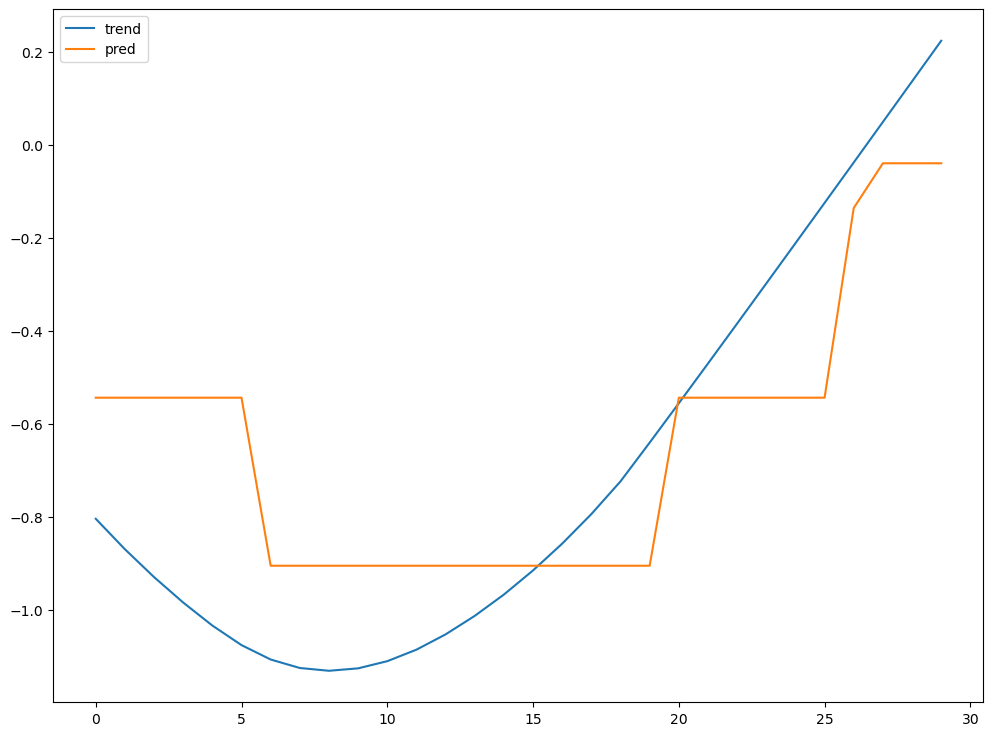

In [7]:
plt.plot(trend_y_test, label='trend')
plt.plot(trend_tdtree.predict(), label='pred')
plt.legend()
plt.show()

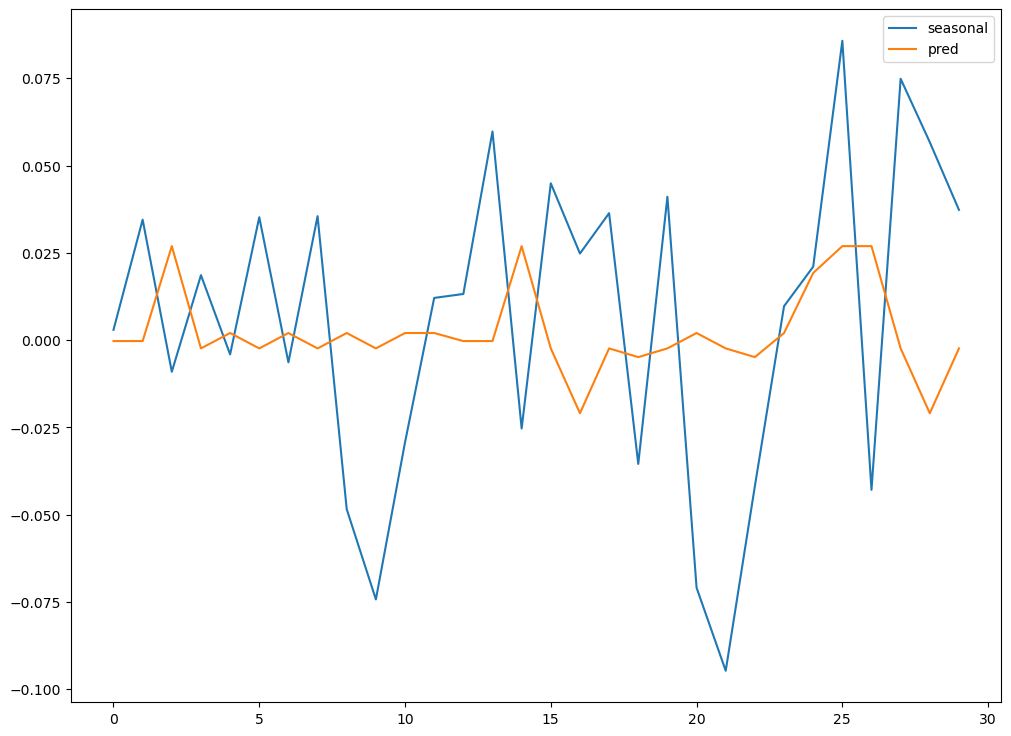

In [8]:
plt.plot(seasonal_y_test, label='seasonal')
plt.plot(seasonal_tdtree.predict(), label='pred')
plt.legend()
plt.show()

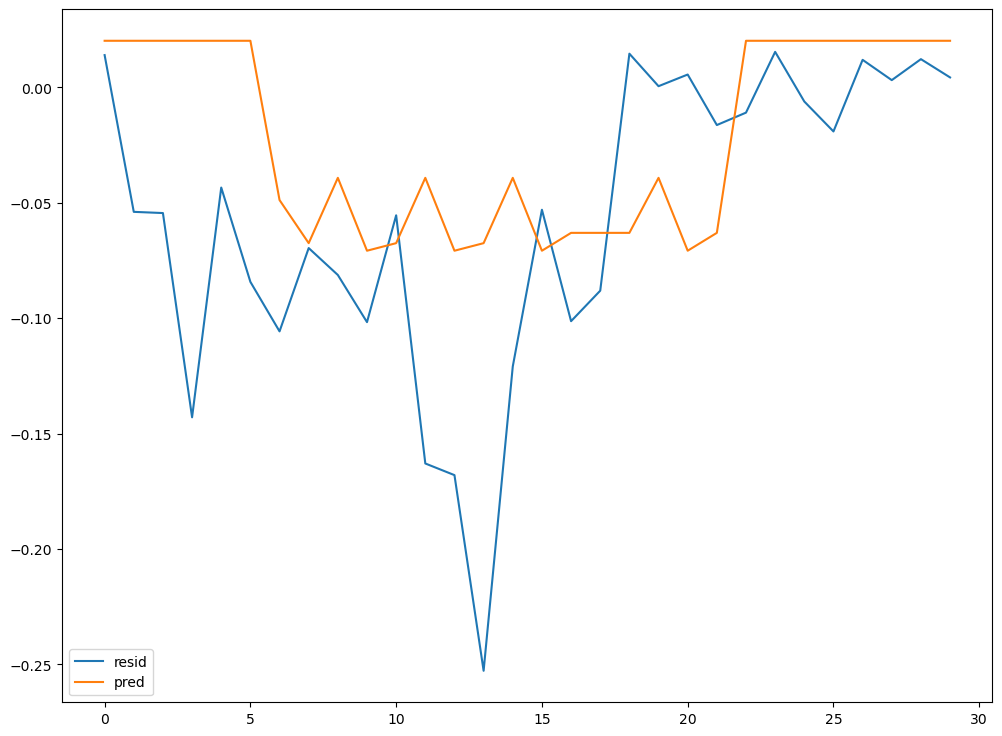

In [9]:
plt.plot(resid_y_test, label='resid')
plt.plot(resid_tdtree.predict(), label='pred')
plt.legend()
plt.show()

In [10]:
trend_tdtree.tree_df

,n,mean,depth,eval,feature_index,threshold,leaf
0,265,0.078177,0,0.266269,0,0.293216,False
1,167,-0.234632,1,0.138543,1,-0.90168,False
2,98,0.61123,1,0.103319,1,0.323301,False
3,10,-0.904877,2,100000000,-1,None,True
4,157,-0.191942,2,0.108685,2,-0.218904,False
5,5,-0.05165,2,100000000,-1,None,True
6,93,0.646869,2,0.077308,2,0.856429,False
7,-1,NaN,3,NaN,NaN,NaN,False
8,-1,NaN,3,NaN,NaN,NaN,False
9,69,-0.501921,3,0.036369,3,-0.274455,False


In [11]:
seasonal_tdtree.tree_df

,n,mean,depth,eval,feature_index,threshold,leaf
0,265,0.000361,0,0.001117,0,-0.055642,False
1,5,0.026912,1,100000000,-1,None,True
2,260,-0.00015,1,0.001208,1,-0.020279,False
3,-1,NaN,2,NaN,NaN,NaN,False
4,-1,NaN,2,NaN,NaN,NaN,False
5,51,0.001001,2,0.000555,2,0.036626,False
6,209,-0.000431,2,0.001014,2,0.057249,False
7,-1,NaN,3,NaN,NaN,NaN,False
8,-1,NaN,3,NaN,NaN,NaN,False
9,-1,NaN,3,NaN,NaN,NaN,False


In [12]:
resid_tdtree.tree_df

,n,mean,depth,eval,feature_index,threshold,leaf
0,265,0.008552,0,0.006727,0,-0.091484,False
1,18,-0.048027,1,0.002043,1,-0.080212,False
2,247,0.012676,1,0.006383,1,-0.073646,False
3,5,-0.063024,2,100000000,-1,None,True
4,13,-0.042259,2,0.003209,2,-0.076562,False
5,23,-0.057565,2,0.001883,2,-0.077007,False
6,224,0.019888,2,0.006139,2,-0.091595,False
7,-1,NaN,3,NaN,NaN,NaN,False
8,-1,NaN,3,NaN,NaN,NaN,False
9,5,-0.03918,3,100000000,-1,None,True
